In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

In [ ]:
df=getDF("/content/drive/MyDrive/capstone_data/meta_Digital_Music.json.gz")
df.head()

,asin,title,price,imUrl,related,salesRank,categories,description,brand
0,5555991584,Memory of Trees,9.49,http://ecx.images-amazon.com/images/I/51b5WDjd...,"{'also_bought': ['B000002LRT', 'B000002LRR', '...",{'Music': 939190},"[[CDs & Vinyl, New Age, Celtic New Age], [CDs ...",NaN,NaN
1,6308051551,Don't Drink His Blood,8.91,http://ecx.images-amazon.com/images/I/31LT2n7Q...,NaN,NaN,"[[Digital Music, Alternative Rock, Indie & Lo-...",NEW Combo BLUWAVS CD and FLAC FILE,NaN
2,7901622466,On Fire,11.33,http://ecx.images-amazon.com/images/I/21W29WZw...,"{'also_bought': ['B00000282A', 'B0084O8O9S', '...",{'Music': 58799},"[[CDs & Vinyl, Christian, Rock & Alternative],...",NaN,NaN
3,B0000000ZW,Changing Faces,23.64,http://ecx.images-amazon.com/images/I/51H3Bp-3...,"{'also_bought': ['B00000010Z', 'B0000039Q5', '...",{'Music': 68784},"[[CDs & Vinyl, Dance & Electronic], [CDs & Vin...",,
4,B00000016W,Pet Sounds,9.49,http://ecx.images-amazon.com/images/I/51pDGkXj...,"{'also_bought': ['B0025KVLTM', 'B00007FOMP', '...",{'Music': 77205},"[[CDs & Vinyl, Classic Rock], [CDs & Vinyl, Po...",NaN,NaN


In [ ]:
df2=getDF("/content/drive/MyDrive/capstone_data/reviews_Digital_Music.json.gz")
df2.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2EFCYXHNK06IS,5555991584,"Abigail Perkins ""Abby &#34;Reads Too Much&#34...","[4, 5]",The anthemic title track begins &quot;The Memo...,5.0,Enya Experiments And Succeeds,978480000,"01 3, 2001"
1,A1WR23ER5HMAA9,5555991584,AKB,"[1, 1]",Just when I thought Enya couldn't possibly get...,5.0,How to improve upon perfection.,953424000,"03 19, 2000"
2,A2IR4Q0GPAFJKW,5555991584,Alexander,"[0, 0]",Nice CD for easy listening. My husband and I ...,4.0,Good listening.,1393545600,"02 28, 2014"
3,A2V0KUVAB9HSYO,5555991584,Alison Hight,"[0, 1]","I really liked this CD, especially the differe...",4.0,Loved It,966124800,"08 13, 2000"
4,A1J0GL9HCA7ELW,5555991584,"Al the Pal ""Al the Pal""","[3, 3]",Enya's richly chorded style has smitten me onc...,5.0,Another Hauntingly Beautiful Collection of Songs,1007683200,"12 7, 2001"


In [ ]:
df=df.merge(df2,on="asin", how='left')

In [ ]:
df.head()

,asin,title,price,imUrl,related,salesRank,categories,description,brand,reviewerID,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,5555991584,Memory of Trees,9.49,http://ecx.images-amazon.com/images/I/51b5WDjd...,"{'also_bought': ['B000002LRT', 'B000002LRR', '...",{'Music': 939190},"[[CDs & Vinyl, New Age, Celtic New Age], [CDs ...",NaN,NaN,A2EFCYXHNK06IS,"Abigail Perkins ""Abby &#34;Reads Too Much&#34...","[4, 5]",The anthemic title track begins &quot;The Memo...,5.0,Enya Experiments And Succeeds,9.784800e+08,"01 3, 2001"
1,5555991584,Memory of Trees,9.49,http://ecx.images-amazon.com/images/I/51b5WDjd...,"{'also_bought': ['B000002LRT', 'B000002LRR', '...",{'Music': 939190},"[[CDs & Vinyl, New Age, Celtic New Age], [CDs ...",NaN,NaN,A1WR23ER5HMAA9,AKB,"[1, 1]",Just when I thought Enya couldn't possibly get...,5.0,How to improve upon perfection.,9.534240e+08,"03 19, 2000"
2,5555991584,Memory of Trees,9.49,http://ecx.images-amazon.com/images/I/51b5WDjd...,"{'also_bought': ['B000002LRT', 'B000002LRR', '...",{'Music': 939190},"[[CDs & Vinyl, New Age, Celtic New Age], [CDs ...",NaN,NaN,A2IR4Q0GPAFJKW,Alexander,"[0, 0]",Nice CD for easy listening. My husband and I ...,4.0,Good listening.,1.393546e+09,"02 28, 2014"
3,5555991584,Memory of Trees,9.49,http://ecx.images-amazon.com/images/I/51b5WDjd...,"{'also_bought': ['B000002LRT', 'B000002LRR', '...",{'Music': 939190},"[[CDs & Vinyl, New Age, Celtic New Age], [CDs ...",NaN,NaN,A2V0KUVAB9HSYO,Alison Hight,"[0, 1]","I really liked this CD, especially the differe...",4.0,Loved It,9.661248e+08,"08 13, 2000"
4,5555991584,Memory of Trees,9.49,http://ecx.images-amazon.com/images/I/51b5WDjd...,"{'also_bought': ['B000002LRT', 'B000002LRR', '...",{'Music': 939190},"[[CDs & Vinyl, New Age, Celtic New Age], [CDs ...",NaN,NaN,A1J0GL9HCA7ELW,"Al the Pal ""Al the Pal""","[3, 3]",Enya's richly chorded style has smitten me onc...,5.0,Another Hauntingly Beautiful Collection of Songs,1.007683e+09,"12 7, 2001"


In [ ]:
df.dropna(inplace=True)

In [ ]:
# convert date column to datetime format
df['Date']= pd.to_datetime(df['reviewTime'])
# keep only the most recent date of purchase
df['rank'] = df.sort_values(['reviewerID','Date']).groupby(['reviewerID'])['Date'].rank(method='min').astype(int)
df_rec = df[df['rank']==1]

In [ ]:
df_rec['recency'] = (df_rec['Date'] - pd.to_datetime(min(df_rec['Date']))).dt.days

<ipython-input-64-6ccb90a19d8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rec['recency'] = (df_rec['Date'] - pd.to_datetime(min(df_rec['Date']))).dt.days


In [ ]:
freq = df_rec.groupby('reviewerID')['Date'].count()
df_freq = pd.DataFrame(freq).reset_index()
df_freq.columns = ['reviewerID','frequency']

In [ ]:
rec_freq = df_freq.merge(df_rec,on='reviewerID')

In [ ]:
#rec_freq['price'] = rec_freq['Quantity']*df['UnitPrice']
m = rec_freq.groupby('reviewerID')['price'].sum()
m = pd.DataFrame(m).reset_index()
m.columns = ['reviewerID','monetary_value']

In [ ]:
rfm = m.merge(rec_freq,on='reviewerID')

In [ ]:
finaldf = rfm[['reviewerID','recency','frequency','monetary_value']]

recency: 


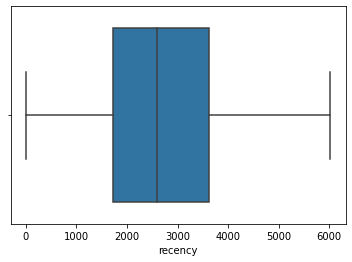

frequency: 


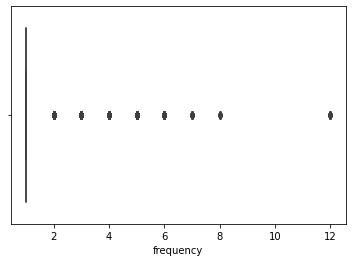

monetary_value: 


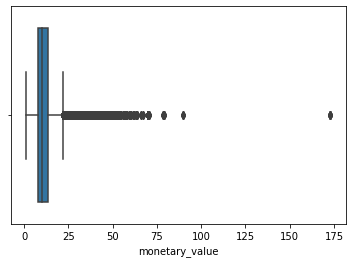

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
list1 = ['recency','frequency','monetary_value']
for i in list1:
    print(str(i)+': ')
    ax = sns.boxplot(x=finaldf[str(i)])
    plt.show()

In [ ]:
from scipy import stats
import numpy as np
# remove the customer id column
new_df = finaldf[['recency','frequency','monetary_value']]
# remove outliers
z_scores = stats.zscore(new_df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = new_df[filtered_entries]

In [ ]:
from sklearn.preprocessing import StandardScaler
new_df = new_df.drop_duplicates()
col_names = ['recency', 'frequency', 'monetary_value']
features = new_df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)

Text(0, 0.5, 'Inertia')

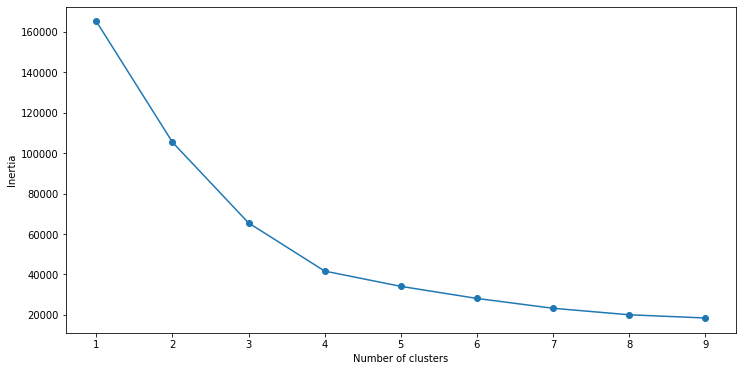

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled_features)
    SSE.append(kmeans.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
# First, build a model with 4 clusters
kmeans = KMeans( n_clusters = 4, init='k-means++')
kmeans.fit(scaled_features)

KMeans(n_clusters=4)

In [ ]:
print(silhouette_score(scaled_features, kmeans.labels_, metric='euclidean'))

0.47730593986299225


In [ ]:
pred = kmeans.predict(scaled_features)
frame = pd.DataFrame(new_df)
frame['cluster'] = pred
## i have to reviewer names also here.

frame['reviewerID'] =finaldf["reviewerID"]
frame

,recency,frequency,monetary_value,cluster,reviewerID
0,5688,1,9.99,1,A00438023NNXSDBGXK56L
1,5469,1,13.95,1,A00715673FB83Q7XQEBCN
2,5781,2,30.10,3,A02852361P0OLWYC4FW7X
4,5635,1,10.59,1,A034294113MZYOJ6UMXUM
5,5983,1,18.95,1,A03973901X96S9K937P3Y
...,...,...,...,...,...
74195,539,1,8.49,0,AZZ8GC4OVLS1Q
74197,920,1,3.59,0,AZZIJX3BJAOE2
74198,3609,1,15.06,2,AZZL199Q879FU
74201,5464,1,7.90,1,AZZRPY6IJC7SP


In [ ]:
len(frame["reviewerID"].unique())

55023

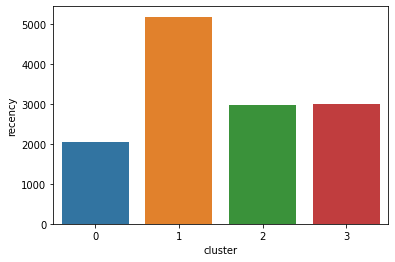

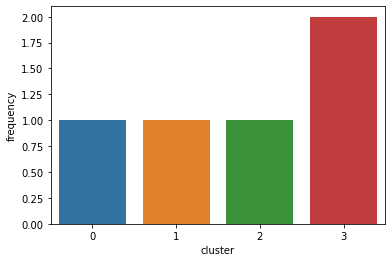

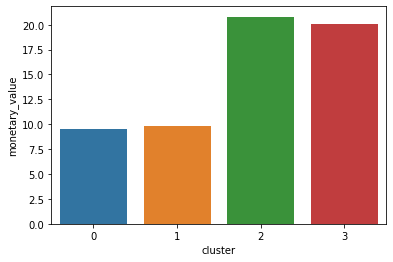

In [ ]:
avg_df = frame.groupby(['cluster'], as_index=False).mean()
for i in list1:
    sns.barplot(x='cluster',y=str(i),data=avg_df)
    plt.show()

In [ ]:
### Interpretation :-
0 cluster : These customers are less frequent customers ,they come very rarely.aslo seeing the monetory values purchase cost is also.
1 cluster : These are very old customers with less frequency as well as less purchase values.
2 cluster : These customers are not new also not so frequent buyers but their purchases are high.
3 cluster : These are most loyal customers with high frequency as well as with high purchasing will.